In [1]:
import pandas as pd
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [2]:
df = pd.read_csv('/Users/denispavlenko/Documents/Masters/Social network/Laws_22.05.2022.csv',decimal=",")

In [3]:
# Добавляем нормальные headers
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
del new_header

In [4]:
laws = df[df['Номер, наименование'].str.contains("в архиве")]

In [5]:
legislators = pd.read_csv('/Users/denispavlenko/Documents/Masters/legislators.csv',decimal=",")

In [6]:
legislators_matrix = pd.DataFrame(  columns = legislators.Name, 
                                    index=legislators.Name)

In [7]:
legislators_matrix = legislators_matrix.fillna(0)

In [8]:
for name1 in legislators_matrix.index:
    for name2 in legislators_matrix.index:
        for entity in laws['СПЗИ']:
            if (name1 in entity) and (name2 in entity):
                legislators_matrix.loc[name1][name2] += 1

In [9]:
non_empty = legislators_matrix.loc[~(legislators_matrix==0).all(axis=1)]
non_empty = non_empty.loc[:,~(non_empty==0).all(axis=0)]

In [10]:
np.fill_diagonal(non_empty.values, 0)

In [11]:
non_empty

Name,С.В.Авксентьева,А.Г.Аксаков,И.А.Ананских,А.А.Аникеев,О.Н.Ануфриева,Н.В.Арефьев,Р.А.Баталова,К.М.Бахарев,М.Н.Берулава,Н.Р.Будуев,...,А.М.Хамитов,Н.Г.Цед,А.В.Чепа,Б.А.Чернышов,С.А.Шаргунов,Ю.Н.Швыткин,Г.В.Шилкин,А.В.Шипулин,А.М.Шолохов,Е.А.Ямпольская
Name,,,,,,,,,,,,,,,,,,,,,
С.В.Авксентьева,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
А.Г.Аксаков,0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
И.А.Ананских,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
А.А.Аникеев,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
О.Н.Ануфриева,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ю.Н.Швыткин,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Г.В.Шилкин,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
А.В.Шипулин,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
G = nx.from_numpy_matrix(non_empty.values)

labels = non_empty.columns.values
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

In [12]:
graph = nx.from_numpy_matrix(np.array(non_empty))

In [13]:
graph

Text(0, 0.5, 'Counts')

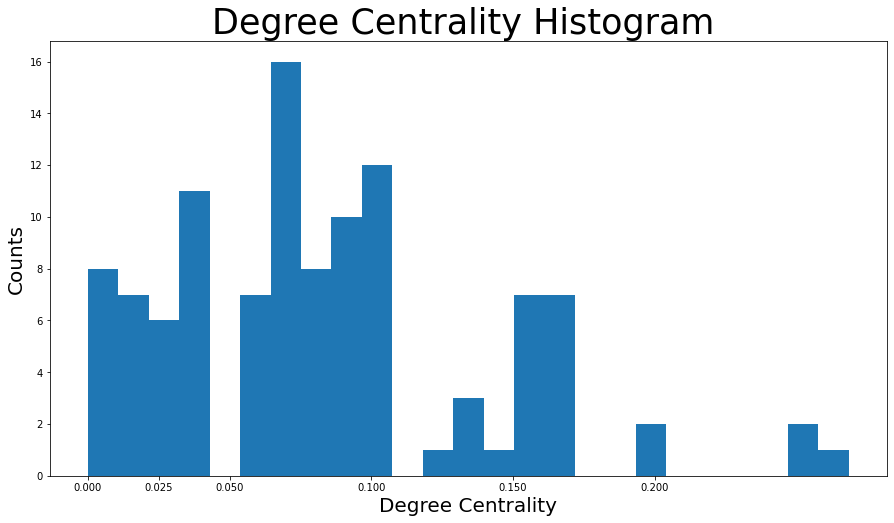

In [14]:
degree_centrality = nx.centrality.degree_centrality(graph)
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

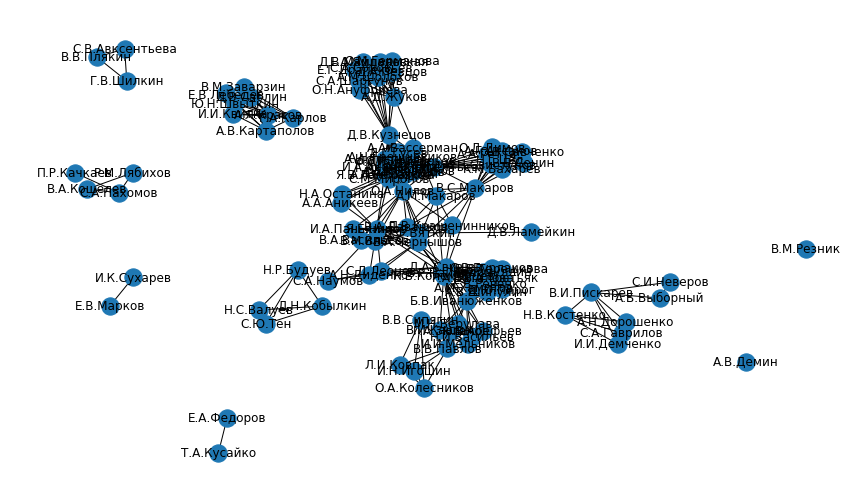

In [41]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, with_labels = True)